<a href="https://colab.research.google.com/github/Nikita1013/Machine-Learning-with-Python/blob/master/K_Nearest_Neighbors_Classifier_from_scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN Classifier is also called as Lazy Model**

Euclidean Distance

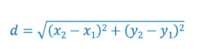

Manhattan Distance

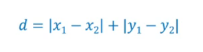

Importing the Dependencies

In [1]:
import numpy as np
import statistics

K-Nearest Neighbors Classifier

In [5]:
class KNN_Classifier():

  def __init__(self,distance_metric):
    self.get_distance_metric = distance_metric


  def get_distance_metrics(self, training_data_point, test_data_point):

    if (self.distance_metric == 'euclidean'):

      dist = 0

      for i in range(len(training_data_point) -1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2     # Refer to the Euclidean Distance Formula

      euclidean_dist = np.sqrt(dist)
      return euclidean_dist


    elif (self.get_distance_metric == 'manhattan'):
      dist = 0

      for i in range(len(training_data_point) -1):
        dist = dist + abs(training_data_point[i] -  test_data_point[i])

      manhattan_dist = dist
      return manhattan_dist


# getting the nearest neighbors
  def nearest_neighbors(self,X_train, test_data, k):

    distance_list = []


    for training_data in X_train:

      distance = get.distance_metric(training_data, test_data)
      distance_list.append(training_data, distance)

    distance_list.sort(key=lambda x:x[i])

    neighbors_list = []

    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list


  def predict(self, X_train, test_data, k):

    neighbors =  self.nearest_neighbors(X_train, test_data, k)

    for data in neighbors:
      label = []
      label.append(data[-1])

    predicted_class = statistics.mode(label)

    return predicted_class



